In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("C:\\Users\\Maggy\\OneDrive\\Desktop\\cookingse.csv")

In [6]:
df

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00,2024-12-01 19:30,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00,2024-12-01 12:20,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30,2024-12-02 20:10,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30,2024-12-02 08:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00,2024-12-03 13:15,15,4.7
5,S006,U002,Spaghetti,Dinner,2024-12-03 18:30,2024-12-03 19:00,30,4.3
6,S007,U005,Grilled Chicken,Dinner,2024-12-04 18:00,2024-12-04 18:45,45,4.6
7,S008,U003,Veggie Burger,Lunch,2024-12-04 13:30,2024-12-04 13:50,20,4.4
8,S009,U001,Grilled Chicken,Dinner,2024-12-05 19:00,2024-12-05 19:40,40,4.9
9,S010,U002,Oatmeal,Breakfast,2024-12-05 07:00,2024-12-05 07:10,10,4.1


In [16]:
# Step 1: Remove duplicate rows
df = df.drop_duplicates()

# Step 2: Check for missing values
print("Missing Values:\n", df.isnull().sum())


# Step 3: Standardize column names (e.g., remove spaces and convert to lowercase)
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

# Display cleaned DataFrame
print(df.head())

Missing Values:
 session_id                    0
user_id                       0
dish_name                     0
meal_type                     0
session_start                 0
session_end                   0
duration_(mins)               0
session_rating                0
calculated_duration_(mins)    0
dtype: int64
  session_id user_id        dish_name  meal_type       session_start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Salad      Lunch 2024-12-01 12:00:00   
2       S003    U003  Grilled Chicken     Dinner 2024-12-02 19:30:00   
3       S004    U001         Pancakes  Breakfast 2024-12-02 07:30:00   
4       S005    U004     Caesar Salad      Lunch 2024-12-03 13:00:00   

          session_end  duration_(mins)  session_rating  \
0 2024-12-01 19:30:00               30             4.5   
1 2024-12-01 12:20:00               20             4.0   
2 2024-12-02 20:10:00               40             4.8   
3 2024-12-02 08:0

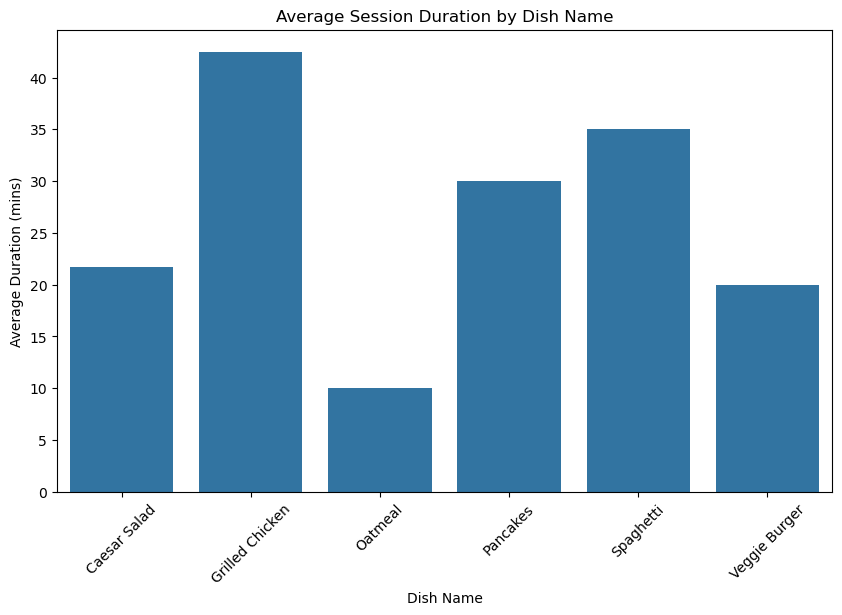

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by Dish Name and calculate average duration
dish_duration = df.groupby('dish_name')['calculated_duration_(mins)'].mean().reset_index()

# Bar plot for average session duration by dish name
plt.figure(figsize=(10, 6))
sns.barplot(data=dish_duration, x='dish_name', y='calculated_duration_(mins)')
plt.title('Average Session Duration by Dish Name')
plt.xlabel('Dish Name')
plt.ylabel('Average Duration (mins)')
plt.xticks(rotation=45)
plt.show()

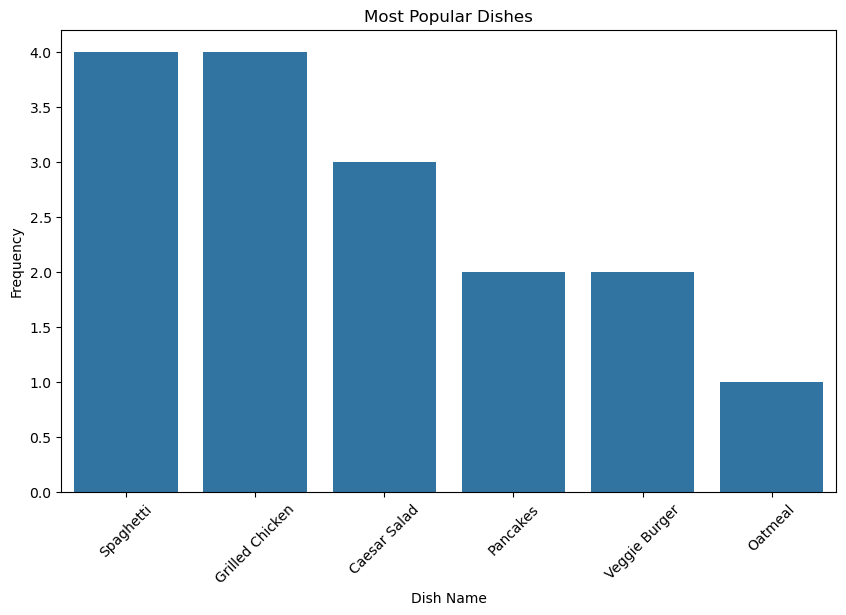

In [26]:
# Count frequency of each dish
popular_dishes = df['dish_name'].value_counts().reset_index()
popular_dishes.columns = ['Dish Name', 'Frequency']

# Bar plot for popular dishes
plt.figure(figsize=(10, 6))
sns.barplot(data=popular_dishes, x='Dish Name', y='Frequency')
plt.title('Most Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

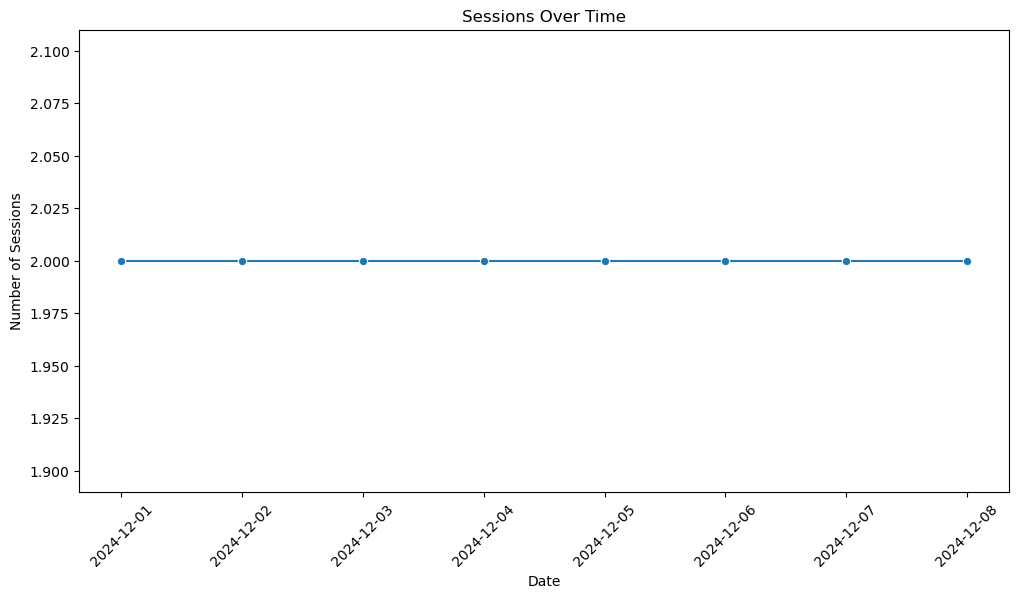

In [30]:
# Extract date from Session Start
df['session_date'] = df['session_start'].dt.date

# Count sessions by date
sessions_by_date = df['session_date'].value_counts().reset_index()
sessions_by_date.columns = ['Date', 'Session Count']
sessions_by_date = sessions_by_date.sort_values('Date')

# Line plot for sessions over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sessions_by_date, x='Date', y='Session Count', marker='o')
plt.title('Sessions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.show()

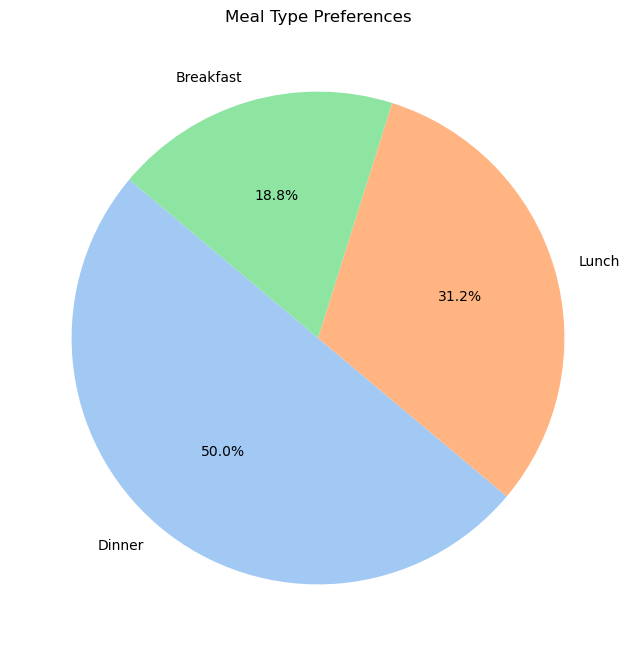

In [32]:
# Count frequency of each meal type
meal_type_counts = df['meal_type'].value_counts().reset_index()
meal_type_counts.columns = ['Meal Type', 'Count']

# Pie chart for meal type distribution
plt.figure(figsize=(8, 8))
plt.pie(meal_type_counts['Count'], labels=meal_type_counts['Meal Type'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Meal Type Preferences')
plt.show()